# <p id="1" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">1: Import Libraries</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load dataset
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29137,35335,0.143303,-3.042889,-1.345492,-1.267292,0.365949,3.770834,-0.716008,0.757140,-0.621763,...,0.732795,0.408063,-0.726060,1.083403,0.345074,-0.105387,-0.085380,0.135254,678.00,0.0
29138,35336,1.211084,0.006371,0.079526,-0.328063,-0.062285,-0.304139,0.039884,0.019127,-0.188904,...,-0.457950,-1.416436,0.253539,-0.300456,-0.110212,0.574988,-0.084849,-0.006608,18.80,0.0
29139,35336,-0.009023,-1.800532,0.046486,1.562200,-0.728926,0.901968,0.368095,0.253678,0.292739,...,0.164512,-0.617256,-0.389162,-0.291445,0.086274,-0.559680,-0.041020,0.105961,562.10,0.0
29140,35336,-0.678073,-0.957750,1.257762,-2.003081,-0.573488,-0.159652,0.250603,-0.300199,-2.659560,...,-0.029575,0.639193,0.390394,0.013387,-0.249428,-0.215685,-0.019444,-0.171646,105.85,0.0


In [ ]:
# Basic data exploration
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29142 entries, 0 to 29141
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    29142 non-null  int64  
 1   V1      29142 non-null  float64
 2   V2      29142 non-null  float64
 3   V3      29142 non-null  float64
 4   V4      29142 non-null  float64
 5   V5      29142 non-null  float64
 6   V6      29142 non-null  float64
 7   V7      29142 non-null  float64
 8   V8      29141 non-null  float64
 9   V9      29141 non-null  float64
 10  V10     29141 non-null  float64
 11  V11     29141 non-null  float64
 12  V12     29141 non-null  float64
 13  V13     29141 non-null  float64
 14  V14     29141 non-null  float64
 15  V15     29141 non-null  float64
 16  V16     29141 non-null  float64
 17  V17     29141 non-null  float64
 18  V18     29141 non-null  float64
 19  V19     29141 non-null  float64
 20  V20     29141 non-null  float64
 21  V21     29141 non-null  float64
 22

In [ ]:
print(df.describe())

               Time            V1            V2            V3            V4  \
count  29142.000000  29142.000000  29142.000000  29142.000000  29142.000000   
mean   21098.236531     -0.212020      0.134546      0.722602      0.215021   
std    11984.584085      1.853518      1.544548      1.623538      1.420248   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     9739.250000     -0.950195     -0.439305      0.264345     -0.697329   
50%    25781.000000     -0.252947      0.155851      0.848590      0.199087   
75%    31897.000000      1.165967      0.793942      1.477173      1.096938   
max    35337.000000      1.960497     16.713389      4.101716     13.143668   

                 V5            V6            V7            V8            V9  \
count  29142.000000  29142.000000  29142.000000  29141.000000  29141.000000   
mean      -0.201111      0.086618     -0.123544      0.029651      0.365469   
std        1.424547      1.322020      1.296454    

In [ ]:
# Check for missing values
df.isnull().sum().sum()

23

## Handle NaN Values

In [ ]:
# Drop rows with NaN values in 'Class'
df = df.dropna(subset=['Class'])

# Verify there are no more NaN values in 'Class'
print(df['Class'].isnull().sum())

0


# <p id="1" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">2. Exploratory Data Analysis (EDA)</p>

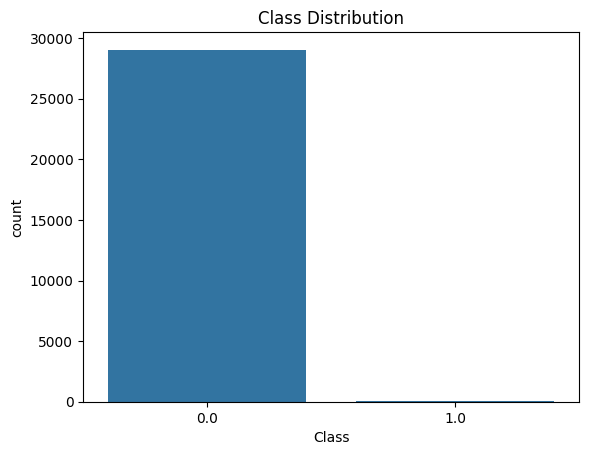

In [ ]:
# Class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

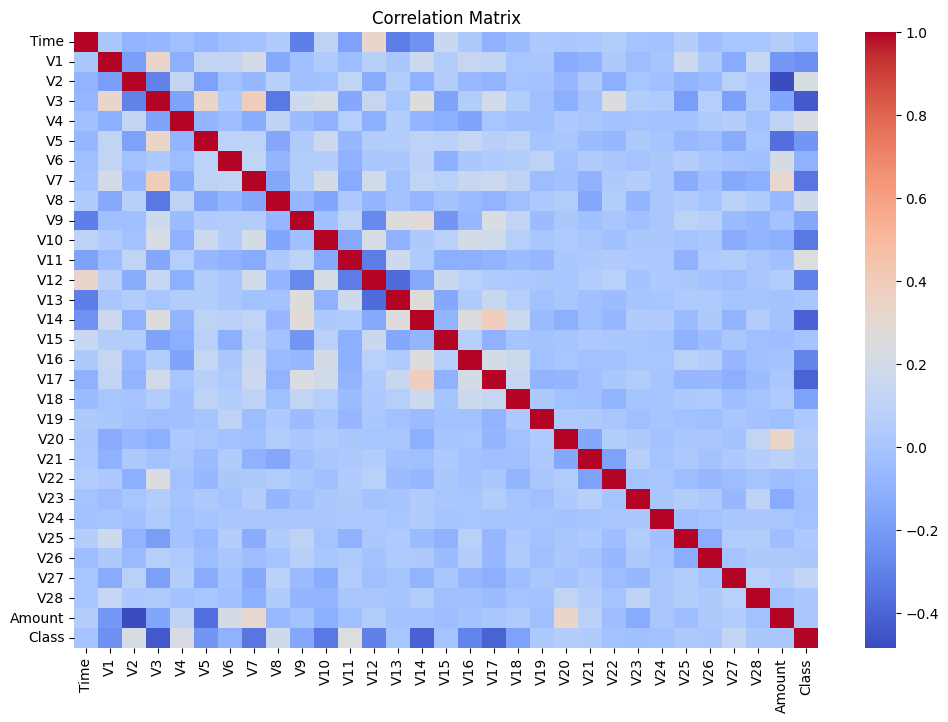

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

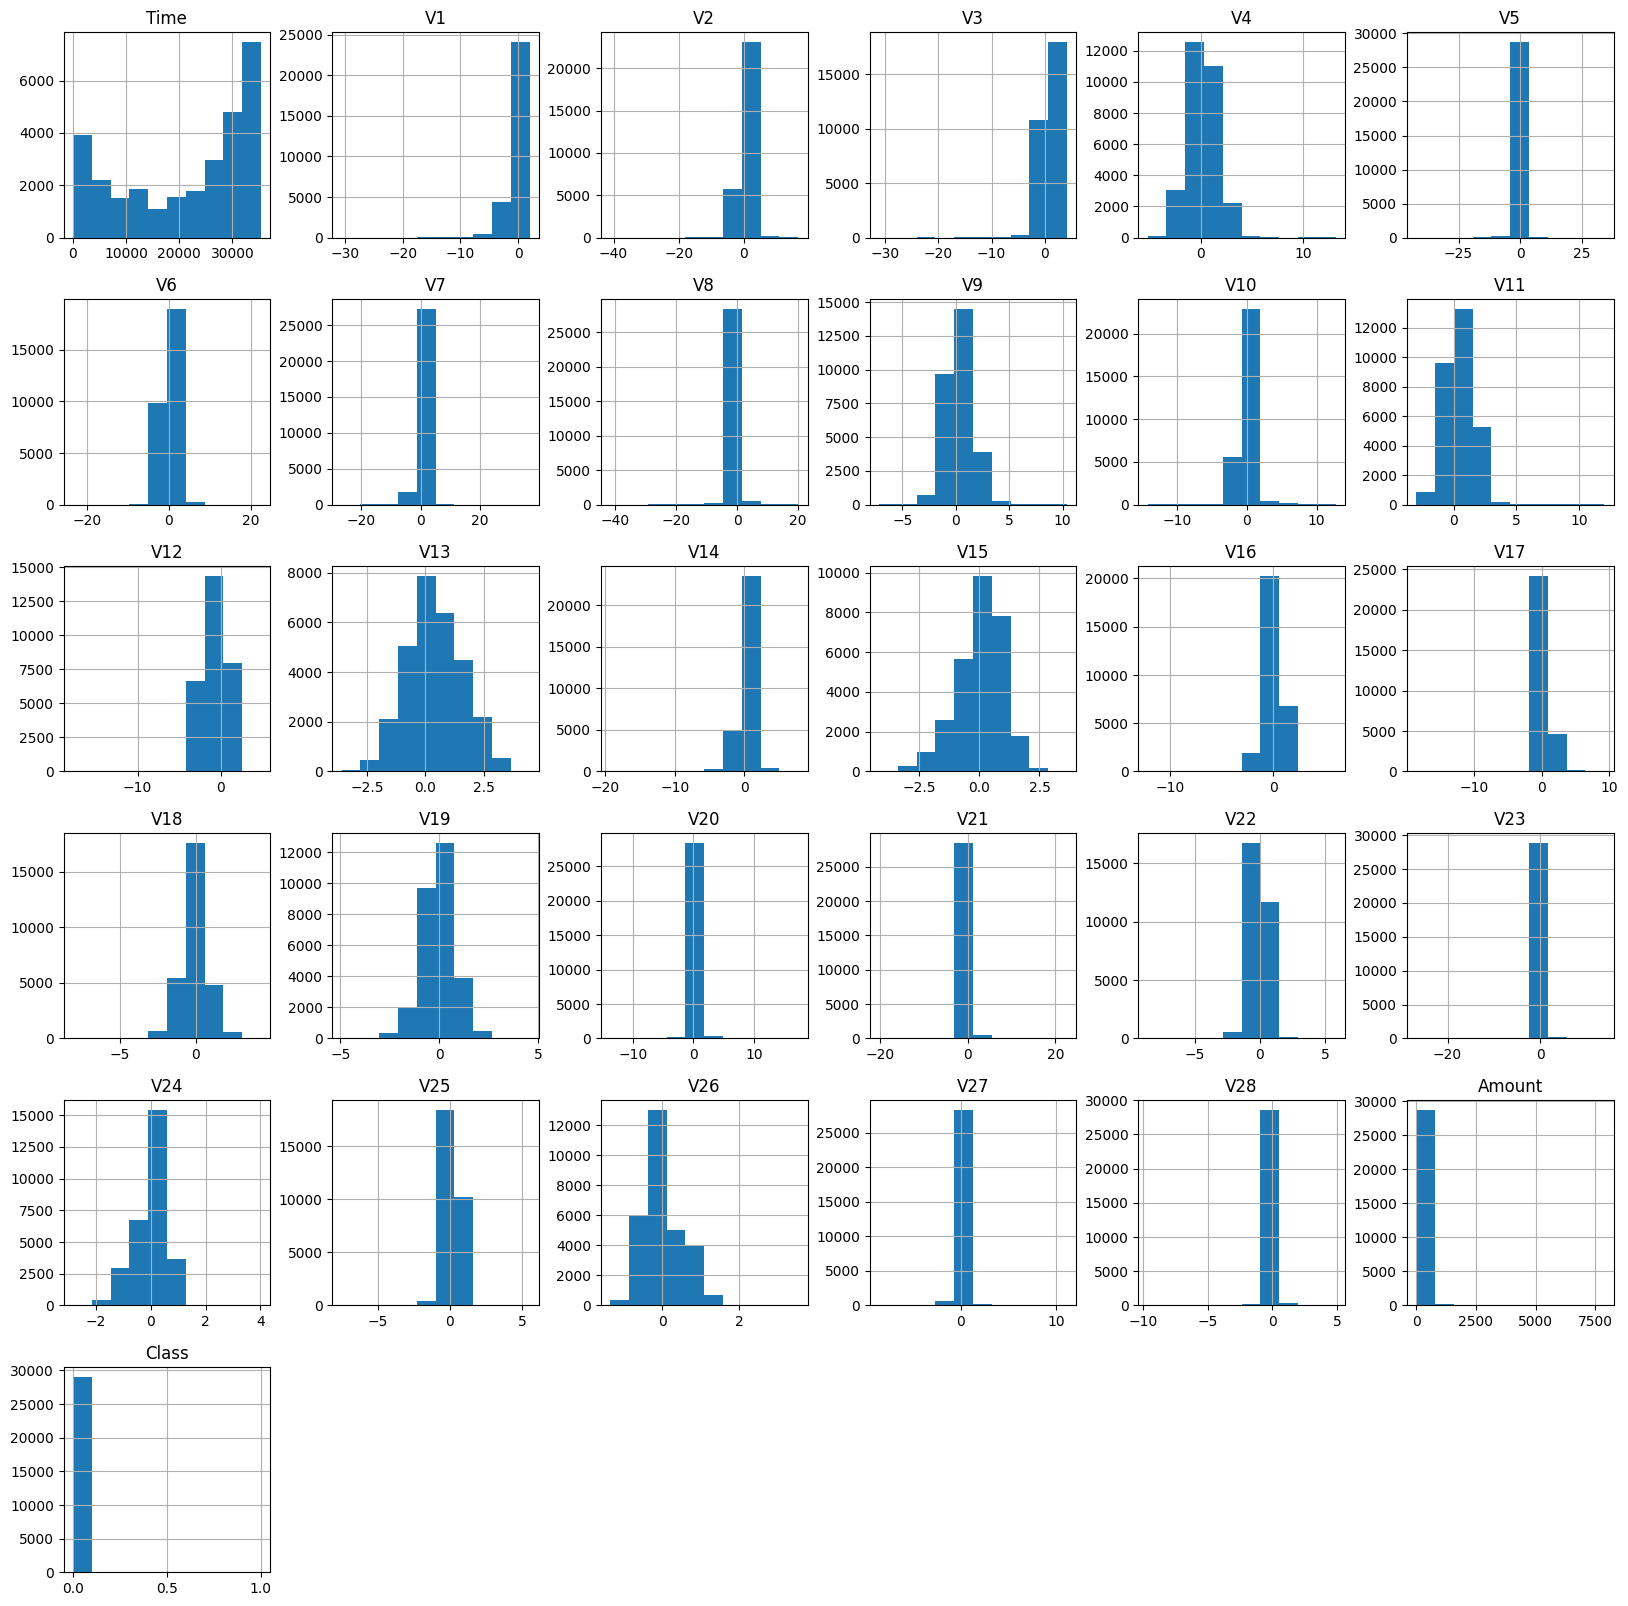

In [ ]:
# Data distribution for some features
df.hist(figsize=(20, 20))
plt.show()

# <p id="1" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">4. Data Cleaning</p>

In [ ]:
# Since there are no missing values, we proceed to the next steps
# Check data types
print(df.dtypes)


Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object


# <p id="1" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">5. Balancing the Data</p>

In [ ]:
# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

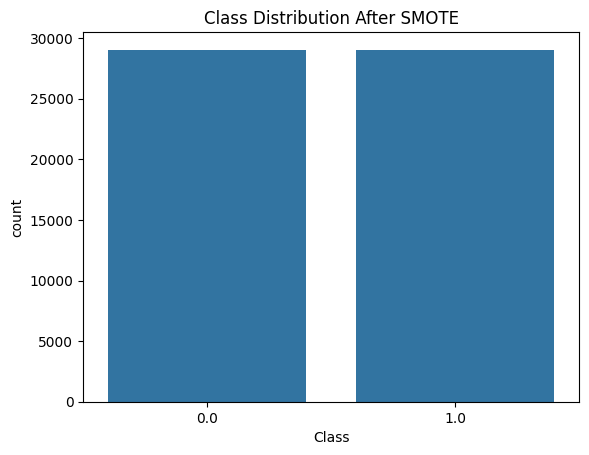

In [ ]:
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

# <p id="1" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">6. Train/Test Split</p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# <p id="1" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">7. Model Selection and Evaluation</p>

In [ ]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results[model_name] = {'Accuracy': accuracy, 'ROC AUC': roc_auc}
    print(f"{model_name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}" if roc_auc is not None else f"{model_name} - Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Logistic Regression - Accuracy: 0.9825, ROC AUC: 0.9981
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      5810
         1.0       0.99      0.97      0.98      5810

    accuracy                           0.98     11620
   macro avg       0.98      0.98      0.98     11620
weighted avg       0.98      0.98      0.98     11620

[[5758   52]
 [ 151 5659]]


SVM - Accuracy: 0.9969, ROC AUC: 0.9996
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      5810
         1.0       0.99      1.00      1.00      5810

    accuracy                           1.00     11620
   macro avg       1.00      1.00      1.00     11620
weighted avg       1.00      1.00      1.00     11620

[[5774   36]
 [   0 5810]]


KNN - Accuracy: 0.9991, ROC AUC: 0.9995
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5810
         1.0       1.00      1.00      1.00

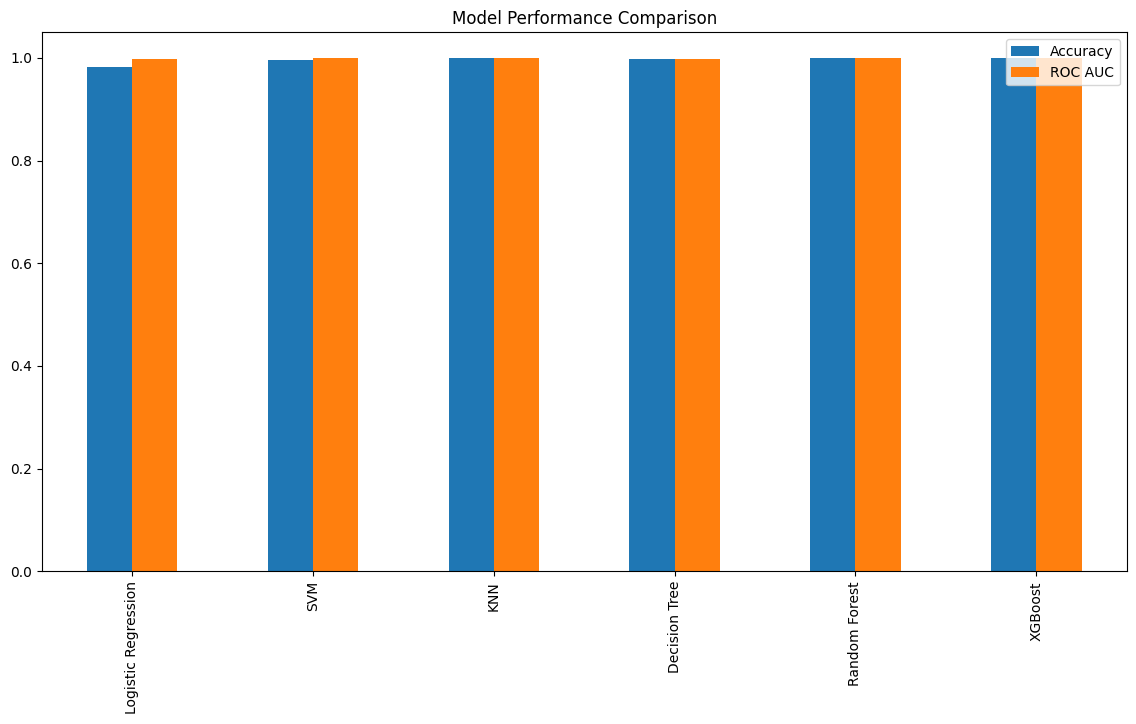

In [ ]:
# Display results
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(14, 7))
plt.title('Model Performance Comparison')
plt.show()

# <p id="1" style="justify-content: center; align-items: center; background-color: #85C1E9; border-radius: 10px; border: 1px solid #3498DB; text-align: center; padding: 12px 0;">8. Hyperparameter Tuning</p>

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best ROC AUC Score: 1.0000


In [ ]:
# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]
print(f"Best Model - Accuracy: {accuracy_score(y_test, y_pred):.4f}, ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best Model - Accuracy: 0.9996, ROC AUC: 1.0000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5810
         1.0       1.00      1.00      1.00      5810

    accuracy                           1.00     11620
   macro avg       1.00      1.00      1.00     11620
weighted avg       1.00      1.00      1.00     11620

[[5805    5]
 [   0 5810]]


In [ ]:
import joblib

# Save the best model
joblib.dump(best_model, 'credit_card_fraud_model.CSV')

['credit_card_fraud_model.CSV']